In [7]:
import os
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.cm as cm
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
#import sompy
#from sompy.visualization.mapview import View2D
#from sompy.visualization.bmuhits import BmuHitsView
#from sompy.visualization.hitmap import HitMapView
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest


In [8]:
#!pip install pandas-profiling
#!conda install -c districtdatalabs yellowbrick

^C


In [10]:
#!conda install -c bioconda sompy

^C


In [11]:
df_original = pd.read_excel("WonderfulWinesoftheWorld.xlsx")

In [299]:
df = df_original.copy()

In [300]:
df.shape

(10001, 30)

In [301]:
df.head()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [302]:
min(df["Custid"])

1001.0

In [303]:
#prof = ProfileReport(df)

In [304]:
#prof

In [305]:
df.duplicated().sum()

0

In [306]:
df.isna().sum().sum()

2

In [307]:
df.head().sort_index()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend,Rand
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,0,0,0,0,0,0,0,0,0,0.240092
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,0,0,0,1,0,0,0,0,0,0.435944
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,0,0,0,0,0,0,0,0,0,0.350584
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,0,0,0,0,0,0,0,1,1,0.594082
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,0,0,0,0,0,0,0,0,0,0.782248


In [308]:
df.columns

Index(['Custid', 'Dayswus', 'Age', 'Edu', 'Income', 'Kidhome', 'Teenhome',
       'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred',
       'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit',
       'SMRack', 'LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain',
       'Mailfriend', 'Emailfriend', 'Rand'],
      dtype='object')

## Initial Data Visualization

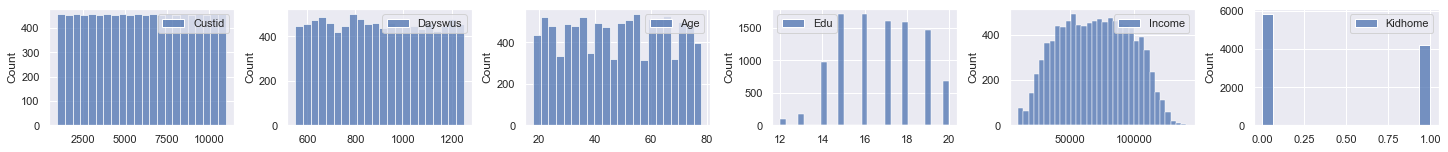

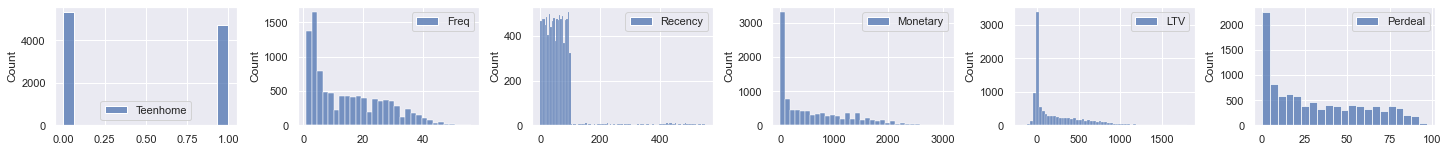

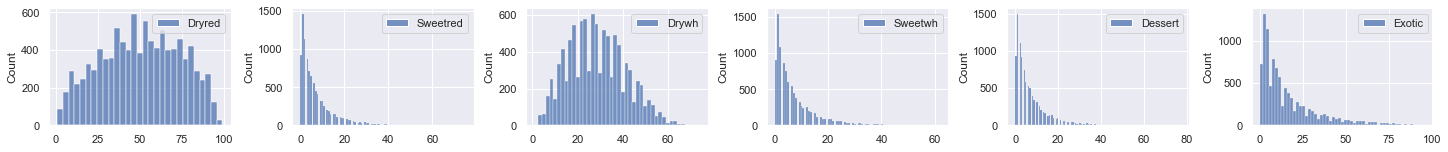

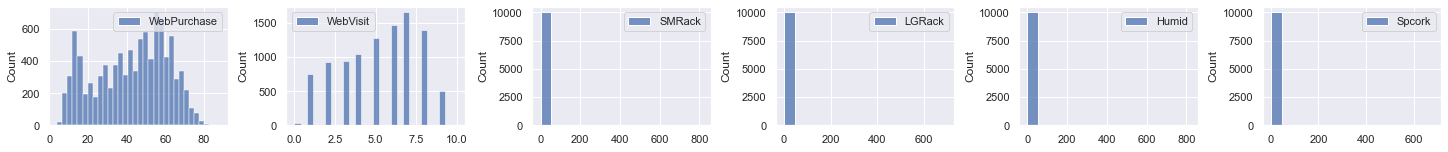

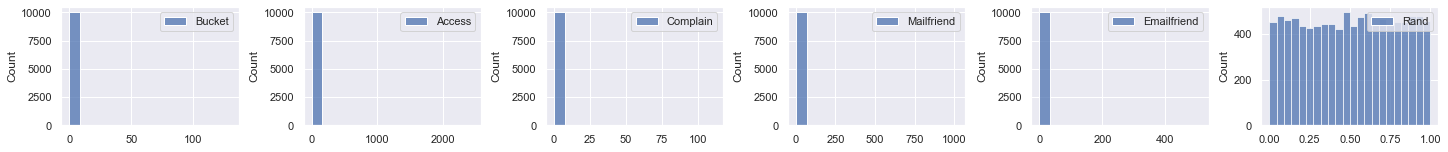

In [309]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
for i in range(5):
    fig, axes = plt.subplots(1,6, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

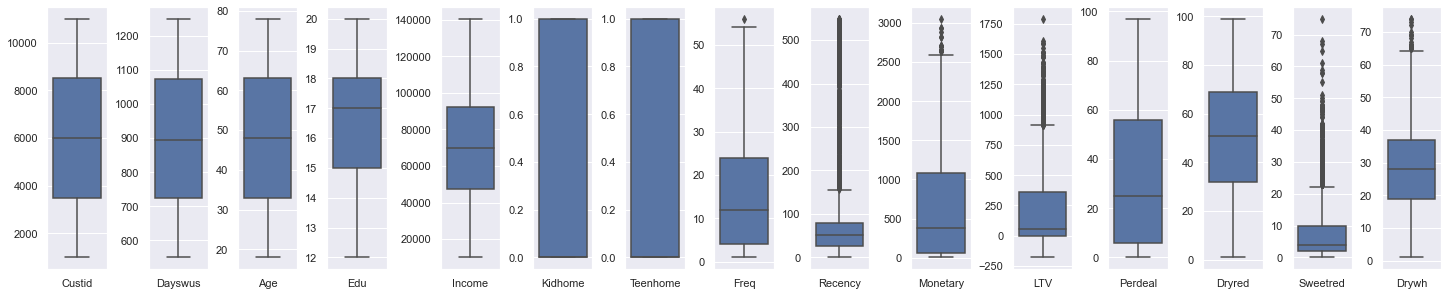

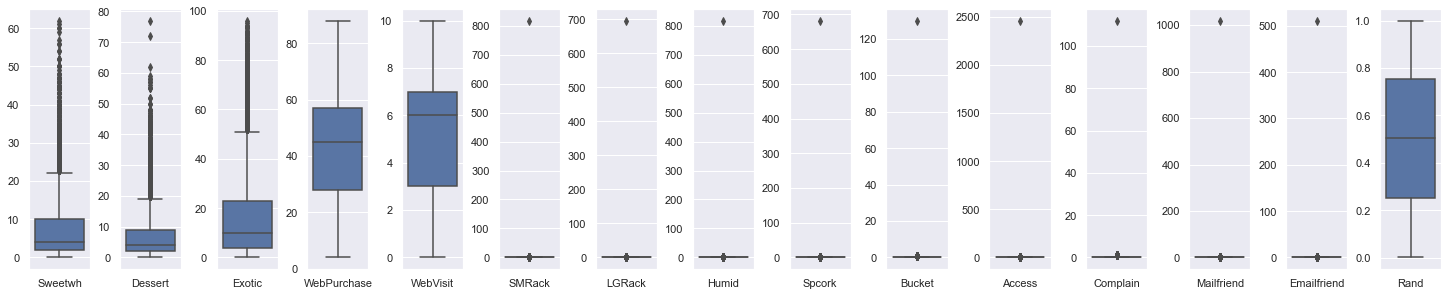

In [310]:
sns.set()

plot_features = df.columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1


for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df.iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

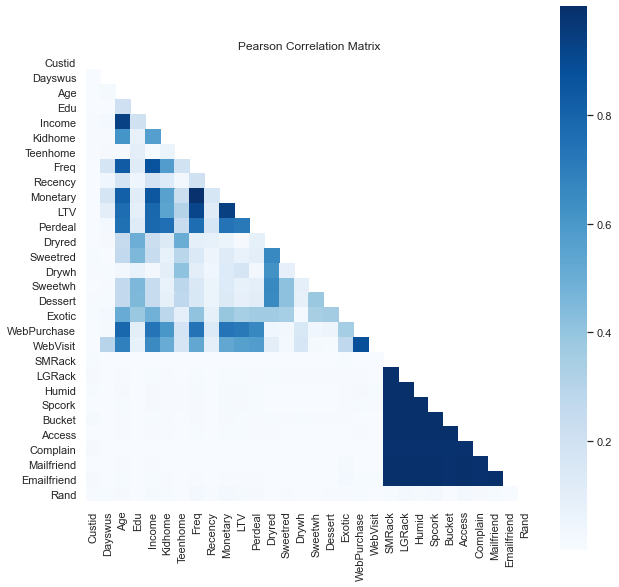

In [311]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()
    
heatmap_pearson(df.corr(method='pearson').abs())

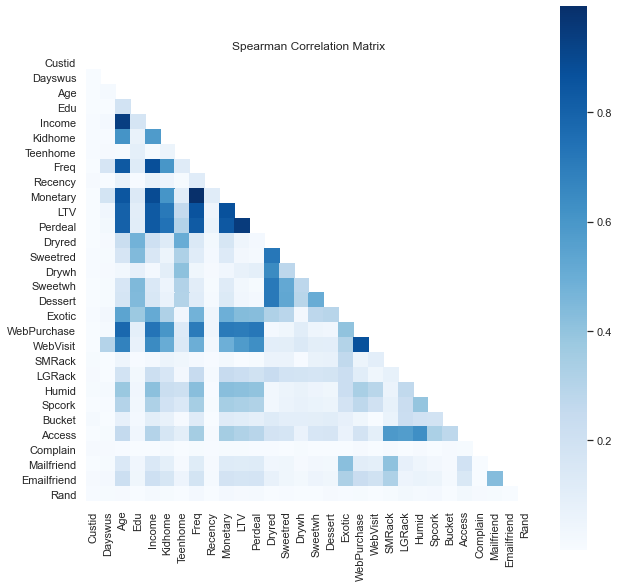

In [312]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()
    
heatmap_spearman(df.corr(method='spearman').abs())

In [ ]:
#fazer as outras correlacoes

As we can see there are some errors/outliers that are needed to be handled. Therefore they must be removed from the dataset.

The outliers quickly identified are in the SMRack, LGRack, Humid, Spcork, Bucket, Access, Complain, Mailfriend and Emailfriend, since the values in these columns are percentages and there are values above 100%.

The column Custid will be the new index of the dataframe.

The column Rand will be dropped since it only returns a random number between 0 and 1.

In [313]:
#fazer histogramas, remover erros, outliers(dbscan, lof)

In [314]:
df = df_original.copy()

In [315]:
df.shape

(10001, 30)

In [316]:
df.drop(["Rand"],axis=1,inplace=True)

In [317]:
df.set_index('Custid',inplace=True)

In [318]:
df.sort_index()

,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
Custid,,,,,,,,,,,,,,,,,,,,,
1001.0,789.000,68.0000,16.0000,90782.000,0.0000,0.0000,29.0000,66.0000,1402.0000,699.0000,...,4.0000,0,1,0,0,0,1,0,0,0
1002.0,623.000,78.0000,20.0000,113023.000,0.0000,0.0000,31.0000,6.0000,1537.0000,565.0000,...,1.0000,0,0,0,0,0,0,0,0,0
1003.0,583.000,24.0000,18.0000,28344.000,1.0000,0.0000,4.0000,69.0000,44.0000,-3.0000,...,7.0000,1,0,0,0,0,1,0,1,1
1004.0,893.000,59.0000,19.0000,93571.000,0.0000,1.0000,21.0000,10.0000,888.0000,207.0000,...,5.0000,0,0,0,0,0,0,0,0,0
1005.0,1062.000,59.0000,18.0000,91852.000,0.0000,1.0000,25.0000,26.0000,1138.0000,355.0000,...,6.0000,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997.0,637.000,76.0000,15.0000,125962.000,0.0000,1.0000,33.0000,75.0000,1668.0000,476.0000,...,5.0000,0,1,1,0,0,2,0,0,0
10998.0,586.000,69.0000,19.0000,99628.000,0.0000,0.0000,30.0000,98.0000,1469.0000,618.0000,...,3.0000,0,0,0,0,0,0,0,0,0
10999.0,598.000,65.0000,14.0000,111018.000,1.0000,0.0000,28.0000,4.0000,1350.0000,739.0000,...,4.0000,0,0,0,0,0,0,0,0,0


In [319]:
df.replace(" ", np.nan, inplace=True)

In [320]:
filters = (
    (df["SMRack"]>100) | (df["LGRack"]>100) | (df["Humid"]>100) | (df["Spcork"]>100) |
    (df["Bucket"]>100) | (df["Access"]>100) | (df["Complain"]>100) | (df["Mailfriend"]>100) | (df["Emailfriend"]>100)
          )
df1=df[filters]

In [321]:
to_remove = list(df1.index)

In [322]:
df = df.drop(to_remove)

In [323]:
df.shape

(10000, 28)

There aren't any more na values.

In [324]:
df.isna().sum().sum()

0

Removing correlated features

In [325]:
data_corr = df.corr()
corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.9] 
corrdata = corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
corrdata.Features2.unique()

array(['Monetary', 'Freq', 'LTV', 'Age', 'Income'], dtype=object)

In [326]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [327]:
for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [328]:
correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [329]:
for c in correlated_group:
    print(c)

['Freq' 'Monetary' 'LTV']
['Income' 'Age']


In [330]:
df.drop(["LTV", "Monetary"], inplace=True, axis=1)

In [331]:
df.drop(["Income"], inplace=True, axis=1)

In [332]:
df.shape

(10000, 25)

Separation of non-metric features and metric features.

In [333]:
non_metric_features = ["Kidhome","Teenhome", "SMRack", "LGRack", "Humid",
                       "Spcork", "Bucket", "Complain", "Mailfriend", "Emailfriend"]

In [334]:
metric_features = df.columns.drop(non_metric_features).to_list()

## Outliers

#### Isolation Forest

In [335]:
data_central = df.copy()

In [336]:
iso = IsolationForest(contamination=0.0005)
iso_df = iso.fit_predict(data_central[metric_features])

In [337]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [338]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 4), 5)*100, "%")

Percentage of data removed after outliers: 0.06 %


In [339]:
#reduzir a percentagem de outliers removed

#### Minimum Covariance Determinant


In [340]:
ee = EllipticEnvelope(contamination=0.01)
ee_df = ee.fit_predict(data_central[metric_features])

In [341]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [342]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / df_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 1.06 %


In [343]:
df.drop(outliers_if.index,inplace=True)
df.drop(outliers_mcd.index,inplace=True)

In [344]:
df.shape

(9895, 25)

## Data Visualization after some Feature Engeneering

Metric Features Histogram


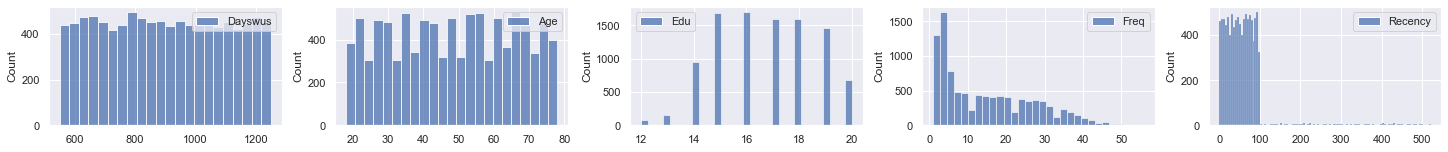

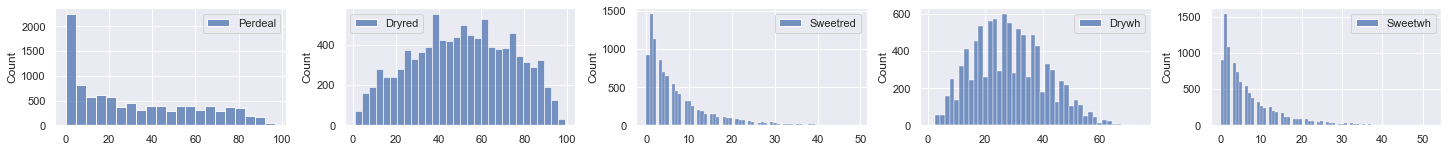

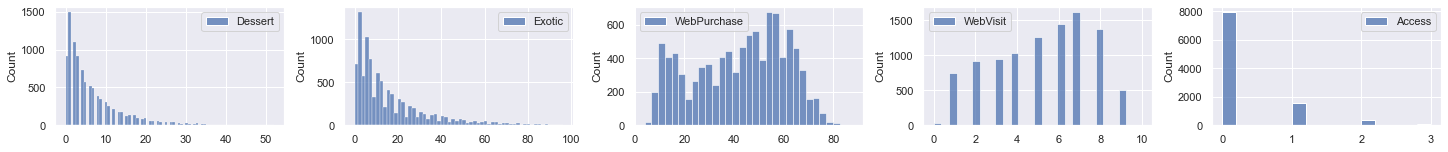

In [346]:
sns.set()

plot_features = df[metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Metric Features Histogram")
for i in range(3):
    fig, axes = plt.subplots(1,5, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

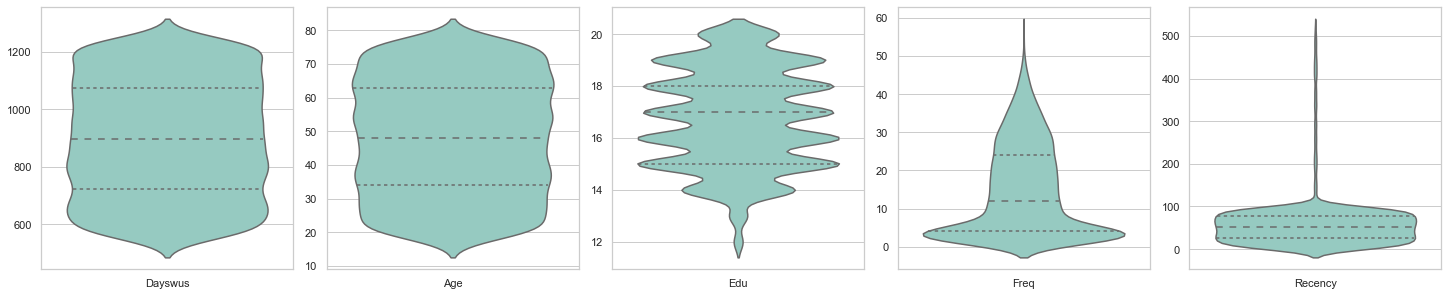

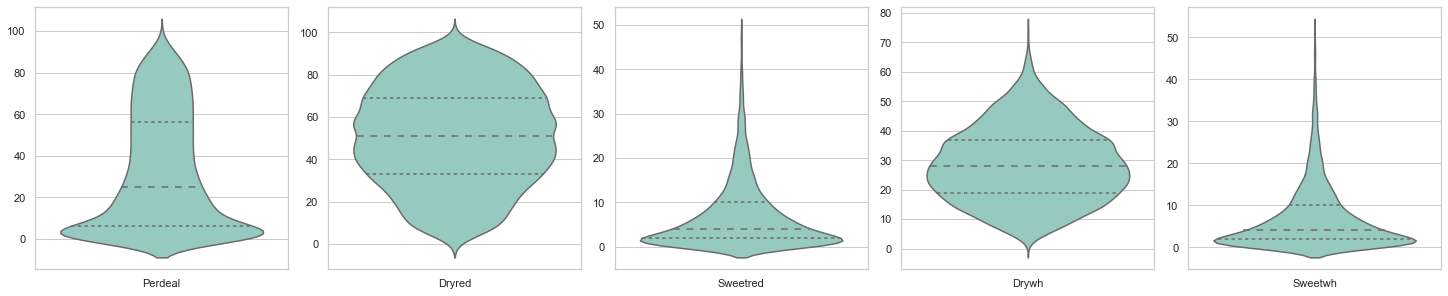

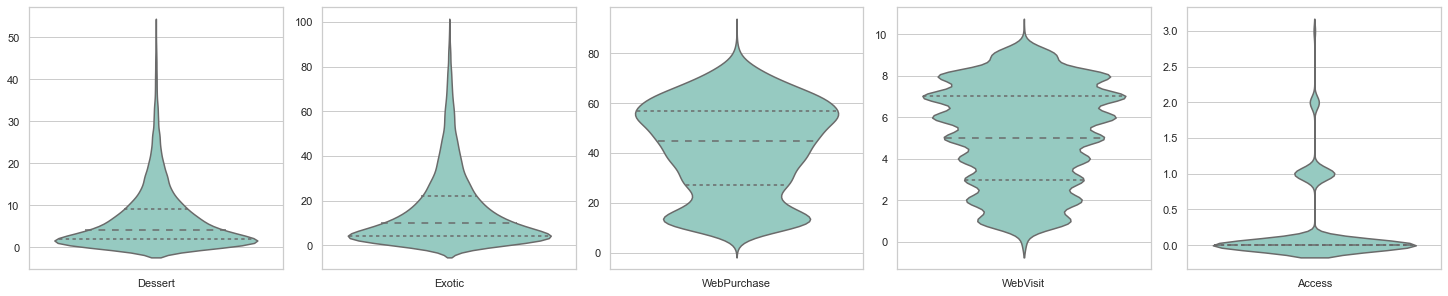

In [368]:
sns.set_theme(style="whitegrid")

j=0
k=1
for i in range(3):
    fig, axes = plt.subplots(1,5, figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.violinplot(data=df[metric_features].iloc[:,j:k], ax=i[0], palette="Set3", split=True,
                       scale="width", inner="quartile")
        j=j+1
        k=k+1

Non Metric Features Histogram


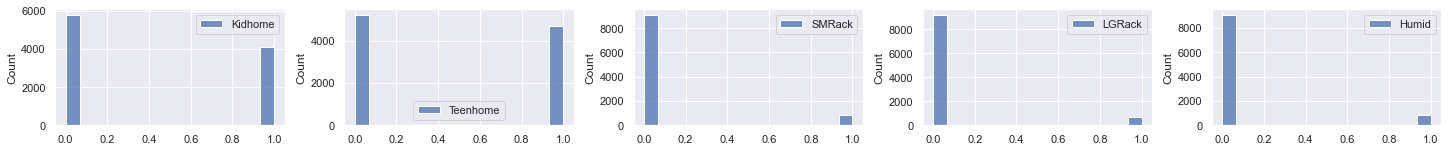

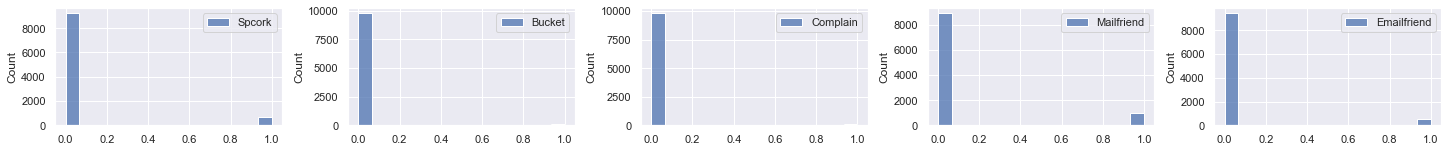

In [347]:
sns.set()

plot_features = df[non_metric_features]
#fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(30,3), constrained_layout=True)
j=0
k=1
print("Non Metric Features Histogram")
for i in range(2):
    fig, axes = plt.subplots(1,5, figsize=(20,2), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.histplot(data=df[non_metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

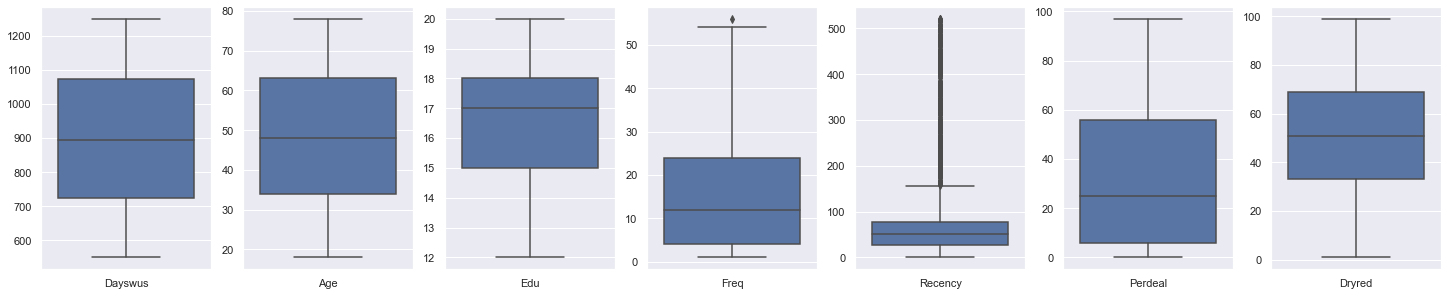

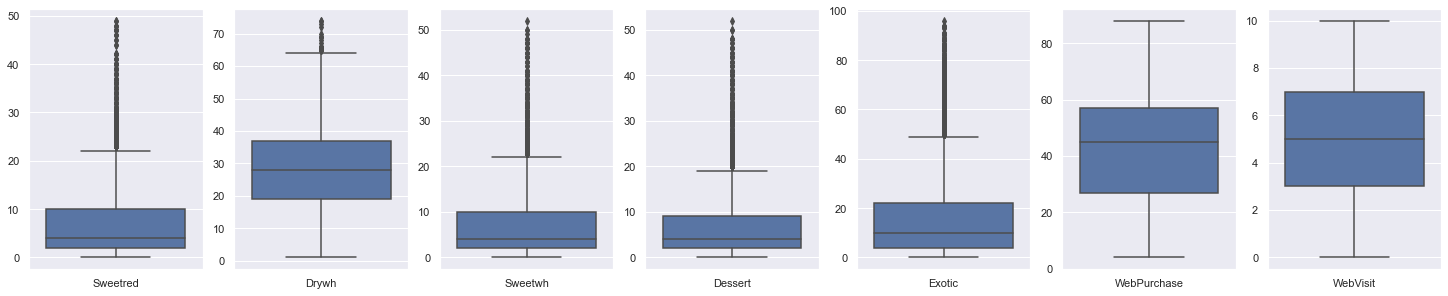

In [348]:
sns.set()

plot_features = df[metric_features].columns
#fig, axes = plt.subplots(1, len(plot_features), figsize=(45,8), constrained_layout=True)
j=0
k=1

for i in range(2):
    fig, axes = plt.subplots(1,int(len(plot_features)/2), figsize=(20,4), constrained_layout=True)
    for i in zip(axes, plot_features):
        sns.boxplot(data=df[metric_features].iloc[:,j:k], ax=i[0])
        j=j+1
        k=k+1

<div class="alert alert-block alert-success">

## 3) Clustering
    
</div>

In [155]:
def plotKElbow(cluster,data,metric):
    visualizer = KElbowVisualizer(cluster, k=(2,12), metric=metric, timings=False,locate_elbowbool=False)
    visualizer.fit(data)        
    visualizer.show()   
    

In [156]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [157]:
def kmeans_cluster(df,n_clust):
    kmclust = KMeans(n_clusters=n_clust, init='k-means++', n_init=15, random_state=1)
    df_labels = kmclust.fit_predict(df)
    return df_labels


In [158]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        #ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [159]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

<div class="alert alert-block alert-info">

### Standardaization
    
</div>

In [165]:
standard_df=pd.DataFrame(StandardScaler().fit(df).transform(df),index=df.index, columns=df.columns)

<div class="alert alert-block alert-info">

### Select the best features
    
</div>

In [242]:
cluster = KMeans(random_state=0)

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


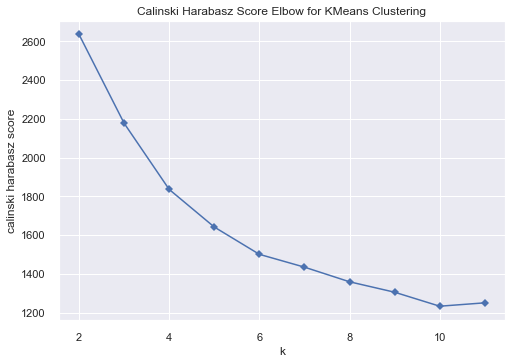

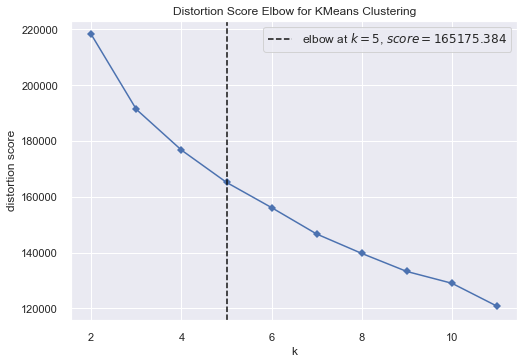

In [243]:
plotKElbow(cluster,standard_df,'calinski_harabasz')
plotKElbow(cluster,standard_df,'distortion')

In [244]:
standard_df['labels']=kmeans_cluster(standard_df,4)

In [245]:
# Preparing the data
X = standard_df.drop(columns='labels')
y = standard_df.labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(rf.score(X_test, y_test)*100))

KeyError: "['labels'] not found in axis"

In [174]:
importances = rf.feature_importances_
indices = np.argsort(importances)

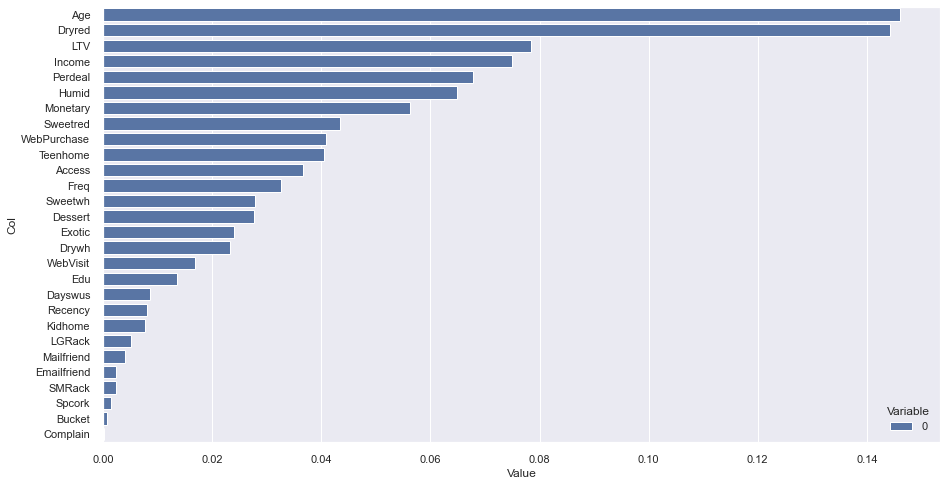

In [175]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [209]:
selected_df=df.loc[:,["Age","Dryred","LTV","Income","Perdeal","Humid","Monetary","Sweetred","WebPurchase","Teenhome"]]

<div class="alert alert-block alert-info">

### Self-Organizing Maps (SOM) + K-means
    
</div>

Considering the good results of the previous segmentation we decided to experiment with the SOM + K-means approach.

In [210]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    selected_df.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=selected_df.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.041000, quantization error: 3.651329

 epoch: 2 ---> elapsed time:  0.051000, quantization error: 2.876616

 epoch: 3 ---> elapsed time:  0.040000, quantization error: 2.823430

 epoch: 4 ---> elapsed time:  0.039000, quantization error: 2.793850

 epoch: 5 ---> elapsed time:  0.040000, quantization error: 2.777682

 epoch: 6 ---> elapsed time:  0.041000, quantization error: 2.738481

 epoch: 7 ---> elapsed time:  0.041000, quantization error: 2.698369

 epoch: 8 ---> elapsed time:  0.041000, quantization error: 2.672770

 epoch: 9 ---> elapsed time:  0.042000, quantization error: 2.667408

 epoch: 10 ---> elapsed time:  0.039000, quantization error: 2.662512

 epoch: 11 ---> elapsed time:  0.043000, quantization error: 2.657347

 epoch: 12 ---> elapsed time:  0.040000, quantization error: 2.651803

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.043000, quantization error: 1.197223

 epoch: 15 ---> elapsed time:  0.080000, quantization error: 1.197204

 epoch: 16 ---> elapsed time:  0.086000, quantization error: 1.197164

 epoch: 17 ---> elapsed time:  0.041000, quantization error: 1.197146

 epoch: 18 ---> elapsed time:  0.044000, quantization error: 1.197145

 epoch: 19 ---> elapsed time:  0.050000, quantization error: 1.197142

 epoch: 20 ---> elapsed time:  0.064000, quantization error: 1.197156

 epoch: 21 ---> elapsed time:  0.051000, quantization error: 1.197152

 epoch: 22 ---> elapsed time:  0.041000, quantization error: 1.197140

 epoch: 23 ---> elapsed time:  0.047000, quantization error: 1.197098

 epoch: 24 ---> elapsed time:  0.051000, quantization error: 1.197084

 epoch: 25 ---> elapsed time:  0.049000, quantization error: 1.197086

 epoch: 26 ---> elapsed time:  0.046000, quantization error: 1.197081

 epoch: 27 ---> elapsed time:  0.039000, quantization error: 1.197081

 epoch

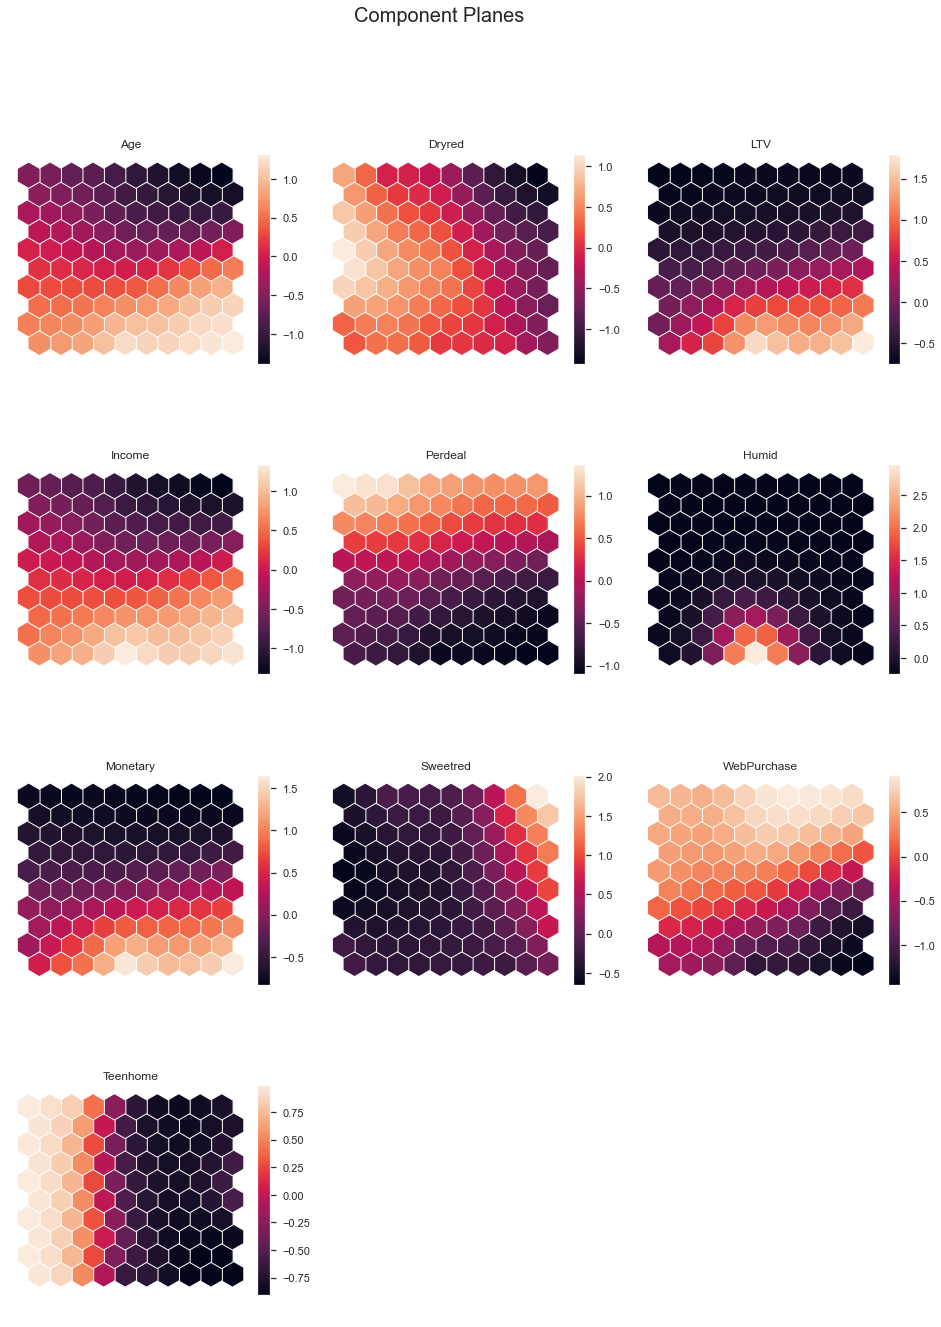

In [211]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

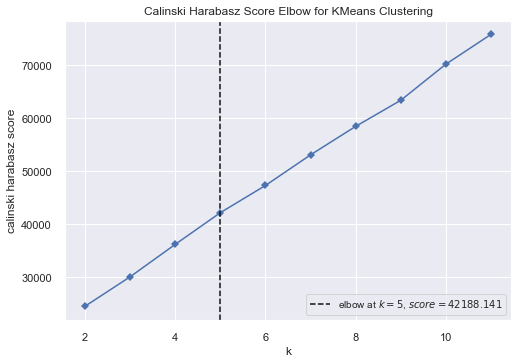

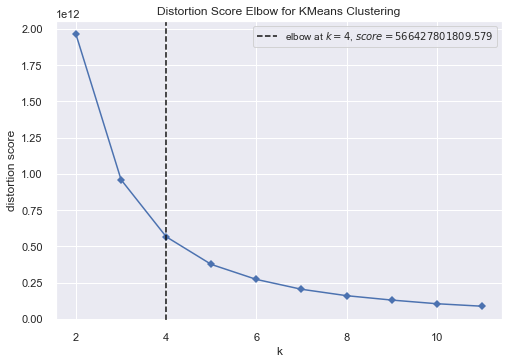

In [212]:
plotKElbow(cluster,selected_df,'calinski_harabasz')
plotKElbow(cluster,selected_df,'distortion')

In [214]:
selected_df.reset_index(inplace=True)

In [218]:
selected_df.drop("Custid",axis=1,inplace=True)

In [229]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)
hits  = HitMapView(12, 12,"Clustering", text_size=10)
#hits.show(sm, anotate=True, onlyzeros=Falsace, labelsize=7, cmap="Pastel1")

plt.show()

In [230]:
nodes = sm.get_node_vectors()

kmeans_nodes = pd.DataFrame(nodes, columns=selected_df.columns)
kmeans_nodes['kmeans_som_label']= nodeclus_labels

In [231]:
# Obtaining SOM's BMUs labels
bmus_map_kmeans = sm.find_bmu(selected_df)[0]  # get bmus for each observation in df

kmeans_bmus = pd.DataFrame(
    np.concatenate((selected_df, np.expand_dims(bmus_map_kmeans,1)), axis=1),
    index=selected_df.index, columns=np.append(selected_df.columns,"BMU")
)

In [235]:
som_kmeans_final["kmeans_som_label"].unique()

array([1])

In [232]:
# Get cluster labels for each observation
som_kmeans_final = kmeans_bmus.merge(kmeans_nodes['kmeans_som_label'], 'left', left_on="BMU", right_index=True)

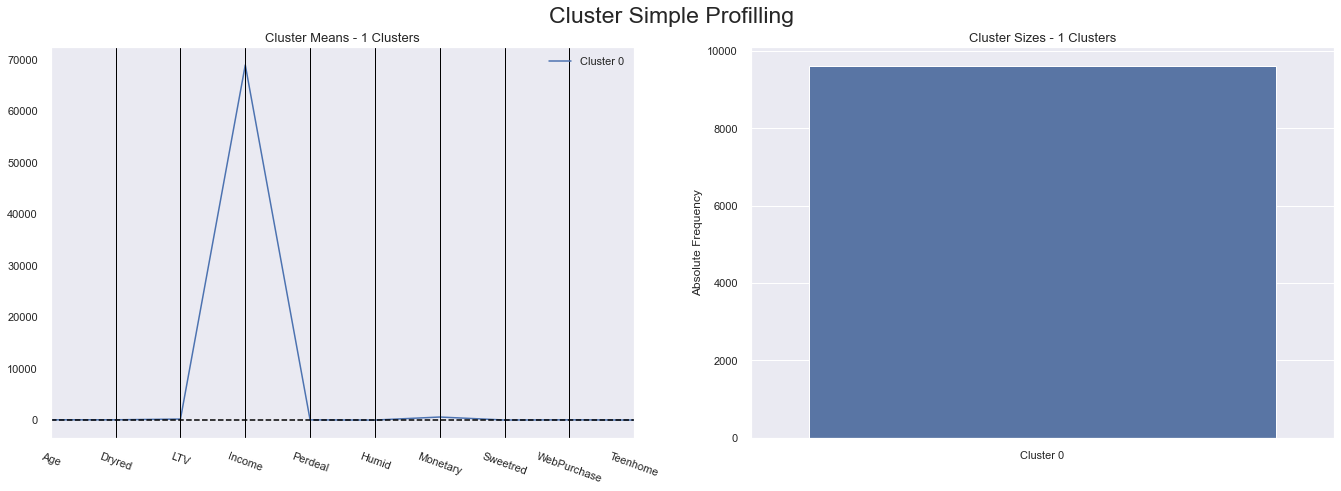

In [233]:
cluster_profiles(som_kmeans_final.drop('BMU',axis=1),["kmeans_som_label"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

<div class="alert alert-block alert-info">

### K-means
    
</div>


In [236]:
kmeans=selected_df.copy()

In [237]:
kmeans['label']=kmeans_cluster(kmeans,4)

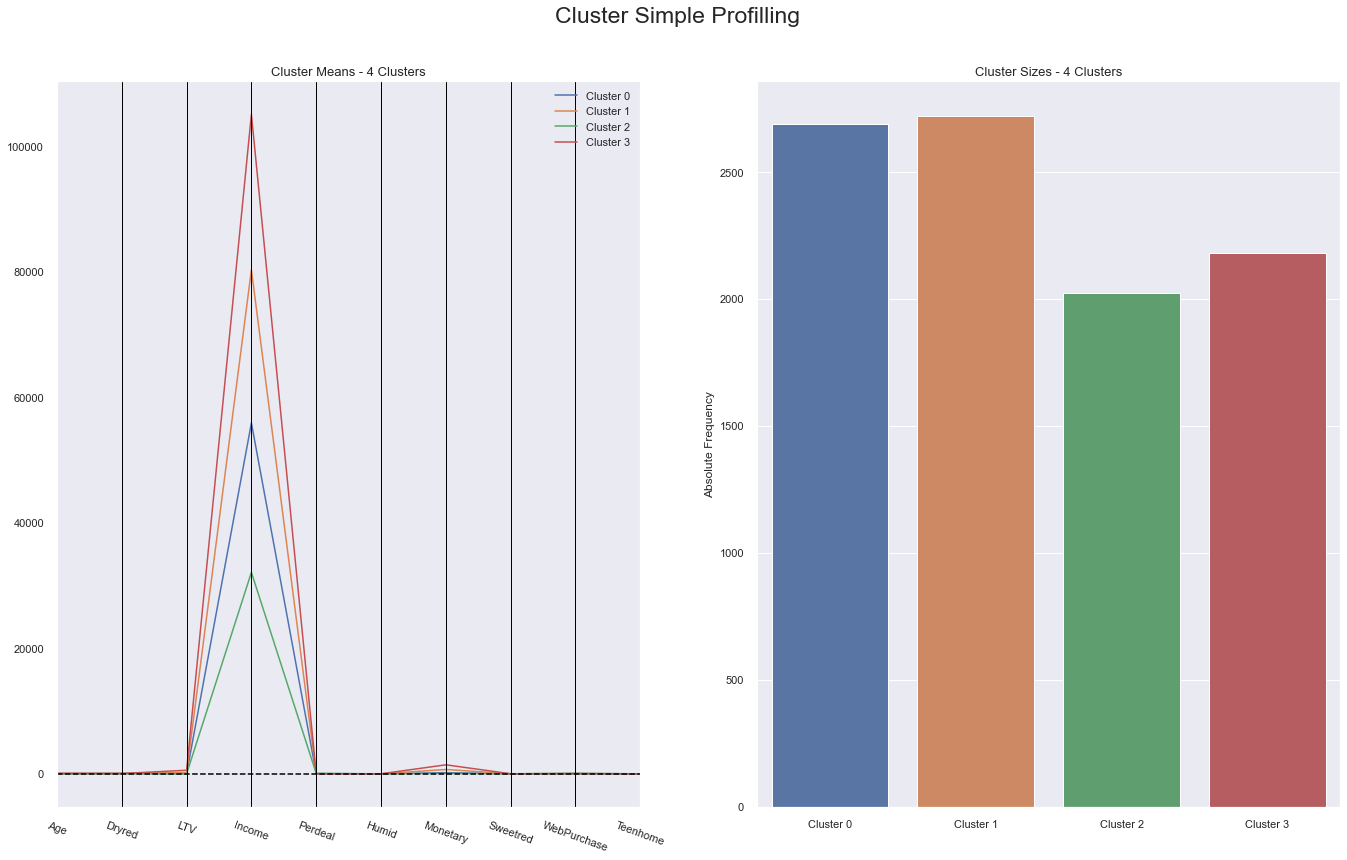

In [238]:
cluster_profiles(kmeans, ["label"], figsize=(23, 13), compar_titles=["K-Means - All Data"])